1.preprocessing

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
data1 = pd.read_csv("1.csv")

In [24]:
data2 = pd.read_csv("2.csv")

In [25]:
data3 = pd.read_csv("3.csv")

In [26]:
data1


,Unnamed: 0,Unnamed: 1,Males,Females,Persons,Unnamed: 5,Median age,Unnamed: 7,People aged 0 to 14 years,People aged 15 to 64 years,People aged 65 years and over
0,20260,Ararat,6402,5563,11965,NaN,46.7,NaN,15.9,60.1,24.0
1,20570,Ballarat,53954,57407,111361,NaN,37.6,NaN,19.3,63.4,17.3
2,20660,Banyule,64571,67369,131940,NaN,39.6,NaN,18.2,63.8,18.0
3,20740,Bass Coast,18343,19102,37445,NaN,49.7,NaN,16.3,55.7,28.0
4,20830,Baw Baw,26779,28105,54884,NaN,40.7,NaN,19.7,60.5,19.9
...,...,...,...,...,...,...,...,...,...,...,...
73,27170,Wodonga,20954,21708,42662,NaN,36.0,NaN,21.1,63.2,15.8
74,27260,Wyndham,142957,140337,283294,NaN,33.0,NaN,25.7,66.3,8.0
75,27350,Yarra,51055,52070,103125,NaN,34.1,NaN,10.7,77.9,11.3
76,27450,Yarra Ranges,79388,80567,159955,NaN,39.6,NaN,18.9,64.5,16.6


In [27]:
data2

,LGA Name,Final Dispatch Code,Unnamed: 2,AVG RT - Seconds,Total Number
0,Ararat,Code 2,NaN,1495,529
1,Ballarat,Code 2,NaN,1301,4301
2,Banyule,Code 2,NaN,1337,3972
3,Bass Coast,Code 2,NaN,1619,1983
4,Baw Baw,Code 2,NaN,1455,2045
...,...,...,...,...,...
73,Wodonga,Code 2,NaN,1380,1561
74,Wyndham,Code 2,NaN,1277,6012
75,Yarra,Code 2,NaN,1356,3445
76,Yarra Ranges,Code 2,NaN,1202,4719


In [28]:
data3


,ppl_receiving_disability_servs_sup_per_1000_pop_rank,lga_name,lga_code,ppl_aged_over_65_yrs_with_prfnd_disability_in_the_cmty_perc,males,females
0,4,Ararat,20260,11.5,14.9,12.8
1,10,Ballarat,20570,13.0,11.4,13.2
2,31,Banyule,20660,13.0,21.7,12.7
3,33,Bass Coast,20740,11.4,18.2,16.8
4,18,Baw Baw,20830,11.0,11.5,14.5
...,...,...,...,...,...,...
73,9,Wodonga,27170,13.7,11.6,12.6
74,77,Wyndham,27260,16.8,21.4,13.6
75,59,Yarra,27350,19.4,15.3,13.7
76,41,Yarra Ranges,27450,10.6,16.0,12.9


In [29]:
import csv

In [30]:
Area_name = []
males = []
females = []
more_than_65 = []
rt_second = []
males_hls = []
females_hls = []
total_number = []
i = 0
while i < 77:
    Area_name.append(data1["Unnamed: 1"][i])
    males.append(data1["Males"][i])
    females.append(data1["Females"][i])
    more_than_65.append(data1["People aged 65 years and over"][i])
    rt_second.append(data2["AVG RT - Seconds"][i])
    total_number.append(data2["Total Number"][i])
    males_hls.append(data3["males"][i])
    females_hls.append(data3["females"][i])
    i = i + 1

In [31]:
unhealth_per = []
population = []
i = 0
while i < 77:
    population.append(males[i]+females[i])
    unhealth_per.append((males[i]*males_hls[i]+females[i]*females_hls[i])/(males[i]+females[i]))
    i = i + 1

In [32]:
file = pd.DataFrame({"Area name":Area_name, "Population":population, "People aged 65 years and over(perc)":more_than_65, "reaction time(second)":rt_second, "number of calls":total_number, "unhealthy people(perc)":unhealth_per })
file.to_csv("4.csv")

PermissionError: [Errno 13] Permission denied: '4.csv'

2.analyzing

In [33]:
import numpy as np

In [34]:
def outlier(data_list):
    rule = (data_list.mean() - 3 * data_list.std() > data_list) | (data_list.mean() + 3 * data_list.std() < data_list)
    index = np.arange(data_list.shape[0])[rule]
    outliers = data_list.iloc[index]
    return outliers.tolist()

In [35]:
data4 = pd.read_csv("4.csv")
data4

,Unnamed: 0,Area name,Population,People aged 65 years and over(perc),reaction time(second),number of calls,unhealthy people(perc)
0,0,Ararat,11965,24.0,1495,529,13.923627
1,1,Ballarat,111361,17.3,1301,4301,12.327907
2,2,Banyule,131940,18.0,1337,3972,17.104570
3,3,Bass Coast,37445,28.0,1619,1983,17.485811
4,4,Baw Baw,54884,19.9,1455,2045,13.036240
...,...,...,...,...,...,...,...
72,72,Whittlesea,236539,12.1,1366,5835,22.555713
73,73,Wodonga,42662,15.8,1380,1561,12.108837
74,74,Wyndham,283294,8.0,1277,6012,17.536069
75,75,Yarra,103125,11.3,1356,3445,14.492126


In [36]:
outlier(data4["People aged 65 years and over(perc)"])


[42.4]

In [37]:
outlier(data4["unhealthy people(perc)"])

[29.26349295]

In [38]:
people_more_than_65 = []
unhealthy = []
i = 0
while i < 77:
    people_more_than_65.append(int(data4["People aged 65 years and over(perc)"][i]*data4["Population"][i]/100))
    unhealthy.append(int((data4["unhealthy people(perc)"][i]*data4["Population"][i]/100)))
    i = i + 1

In [39]:
from scipy import stats

In [40]:
slope, intercept, r_value, p_value, std_err = stats.linregress(total_number, people_more_than_65)

In [41]:
def myfunc(x):
    return slope * x + intercept

mymodel = list(map(myfunc, total_number))

4.170067797605497
2081.575953651589
0.7858659358224345


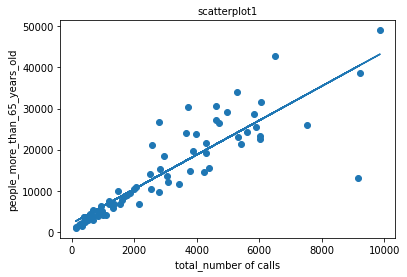

In [44]:

plt.title('scatterplot1',fontsize = 10)
plt.xlabel("total_number of calls")
plt.ylabel("people_more_than_65_years_old")
plt.scatter(total_number, people_more_than_65)
plt.plot(total_number, mymodel)
plt.savefig("plot1.png")

print(slope)
print(intercept)
print(r_value**2)


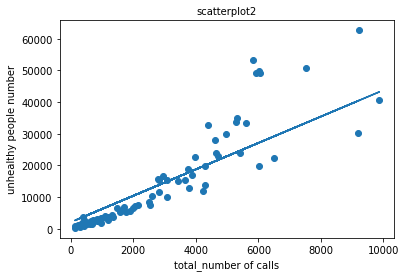

In [47]:
plt.title('scatterplot2',fontsize = 10)
plt.xlabel("total_number of calls")
plt.ylabel("unhealthy people number")
plt.scatter(total_number, unhealthy)
plt.plot(total_number, mymodel)
plt.savefig("plot2.png")


In [48]:
slope, intercept, r_value, p_value, std_err = stats.linregress(total_number, unhealthy)

print(slope)
print(intercept)
print(r_value**2)

5.765610283085431
-2064.457292215042
0.8162789054899288


In [ ]:
def polyfit(x, y, degree):
    results = {}

    coeffs = numpy.polyfit(x, y, degree)
     # Polynomial Coefficients
    results['polynomial'] = coeffs.tolist()

    correlation = numpy.corrcoef(x, y)[0,1]

     # r
    results['correlation'] = correlation
     # r-squared
    results['determination'] = correlation**2

    return results

In [ ]:
nc = pd.read_csv('')
pol = polyfit(nc,)

In [ ]:
outlier(data4["reaction time(second)"])

[3665]

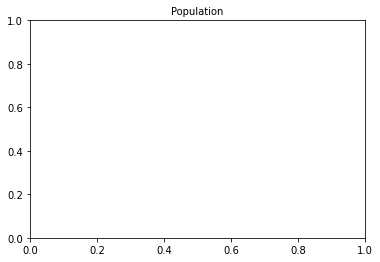

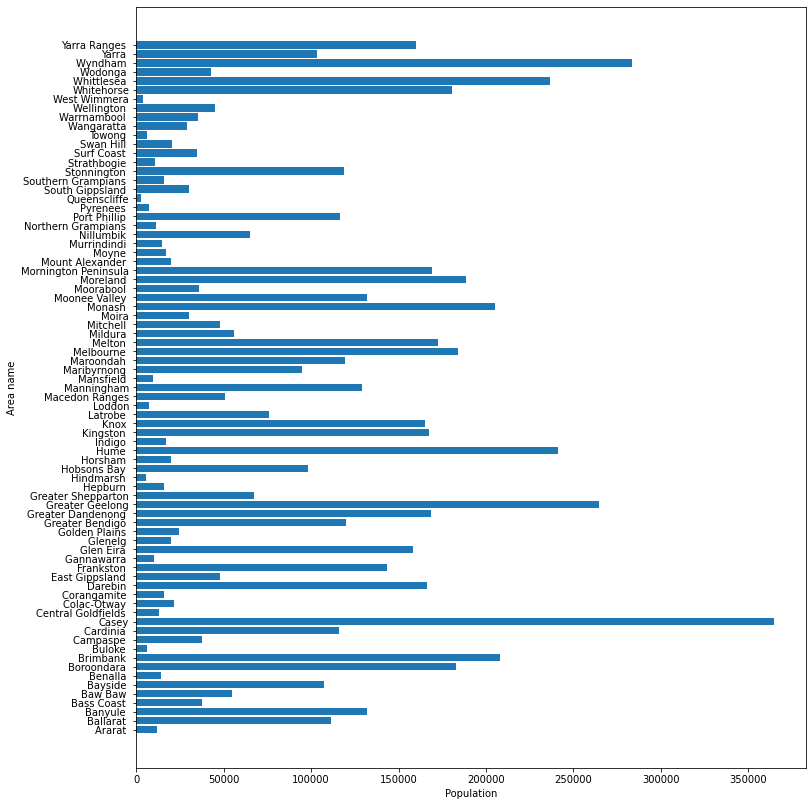

In [ ]:
plt.title('Population',fontsize = 10)
y = data4["Population"]
x = data4["Area name"]
plt.figure(figsize=(12,14))
plt.xlabel("Population")
plt.ylabel("Area name")
plt.barh(x , y)
plt.savefig("bar chart")

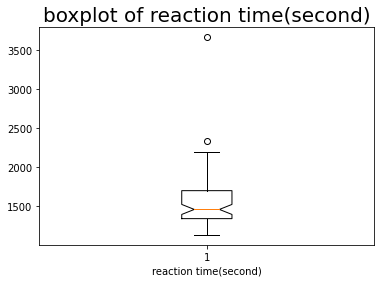

In [ ]:
box_plot = data4["reaction time(second)"]
plt.title('boxplot of reaction time(second)',fontsize = 20)
plt.xlabel("reaction time(second)")
plt.boxplot([box_plot], whis= 1.5,notch = True)
plt.savefig("boxplot.png")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

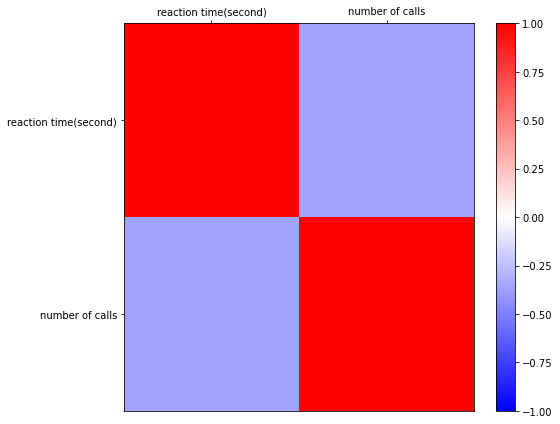

In [ ]:
def draw_heat_map_two():
    data = pd.read_csv('./4.csv', encoding='utf-8', index_col=0)
    data = data[['reaction time(second)','number of calls']]
    data_corr = data.pct_change().corr()

    values = data_corr.values
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)
    heatmap = ax.pcolor(values, cmap=plt.cm.bwr)

    fig.colorbar(heatmap)

    ax.set_xticks(np.arange(0.5, data_corr.shape[1]+0.5, 1))
    ax.set_yticks(np.arange(0.5, data_corr.shape[0]+0.5, 1))
    ax.invert_yaxis()
    ax.xaxis.tick_top()

    ax.set_xticklabels(data_corr.columns)
    ax.set_yticklabels(data_corr.columns)

    heatmap.set_clim(-1, 1)

    plt.tight_layout()

    plt.show()

if __name__ == '__main__':
    draw_heat_map_two()

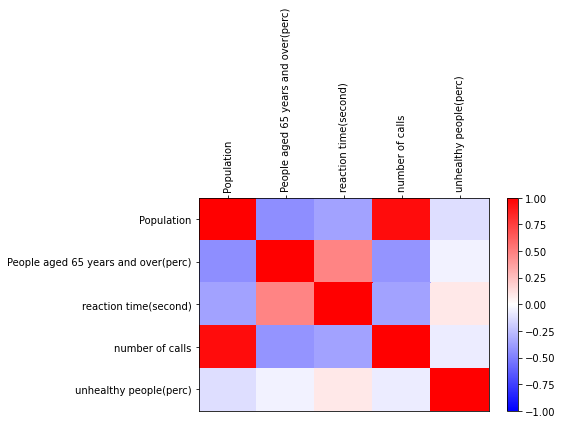

In [ ]:
def draw_heat_map():
    data = pd.read_csv('./4.csv', encoding='utf-8', index_col=0)
    data = data.drop('Area name',axis=1)
    data_corr = data.pct_change().corr()

    values = data_corr.values
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)
    heatmap = ax.pcolor(values, cmap=plt.cm.bwr)

    fig.colorbar(heatmap)

    ax.set_xticks(np.arange(0.5, data_corr.shape[1]+0.5, 1))
    ax.set_yticks(np.arange(0.5, data_corr.shape[0]+0.5, 1))
    ax.invert_yaxis()
    ax.xaxis.tick_top()

    ax.set_xticklabels(data_corr.columns)
    ax.set_yticklabels(data_corr.columns)

    heatmap.set_clim(-1, 1)
    plt.xticks(rotation=90)
    plt.tight_layout()

    plt.savefig('./heatmap.png') 
    plt.show()


if __name__ == '__main__':
    draw_heat_map()
